In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/My Drive/OwnJupyterNotebooks/")
os.getcwd()

'/content/gdrive/My Drive/OwnJupyterNotebooks'

In [0]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

## ROC Receiving Operating Characteristic

ROC curves are for use with binary classifiers, like logistic regression. The true positive rate is plotted on the y-axis and the false positive rate is plotting on the x-axis. Setting probability thresholds that divide both positive and negative probability curves into predicted positive and negative allows the calculation of true and false positive rates. Plotting all combos of true and false positive rates generates the ROC curve.  An ROC curve visualizes all false positive/true positive combinations so that all thresholds can be visualized at once. The closer the ROC curve stays to the y-axis, the lower the false positive rate, and the better the classifier is.  This means that the classifier is better at separating the positive and negative data.  The closer the ROC curve lies to y=x, the closer the classifier's predictions are to chance.

AUC stands for "Area Under Curve," the ROC curve.  The more above 50%, or the closer to 1 that the AUC is, the more effective is the classifier.

ROC curves work even with unbalanced data.  They can be used with more that 2 classes by cycling through each class plotted against the others and generating a curve for each.

#### Generating an ROC curve with old Stack Exchange Data

In [4]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/2019_flagged_unflagged_data_7000_each.csv')
data.head()

,body,flag_id
0,<p>I want to read JT 3D file in c++. I am able...,1
1,<p>I had to solve a Capacitated Orienteering P...,1
2,<p>The SSLServerSocket below blocks in in.read...,1
3,<p>Graph seems to be returning invalid retry-a...,1
4,"<p>componentDidMount(){\n fetch('<a href=""h...",1


In [0]:
from bs4 import BeautifulSoup
data['body'] = data.body.apply(lambda x: BeautifulSoup(str(x), "lxml").get_text())

In [6]:
data.head(2)

,body,flag_id
0,I want to read JT 3D file in c++. I am able to...,1
1,I had to solve a Capacitated Orienteering Prob...,1


In [7]:
reduced_data = data.sample(frac=.25)
reduced_data.shape

(3500, 2)

In [8]:
reduced_data = reduced_data.reset_index(drop=True)
reduced_data.head(2)

,body,flag_id
0,"Sample data:\nGroup <- c(""a"", ""a"", ""a"", ""b"", ""...",0
1,I created a symfony 3.4 application using netb...,0


#### Tokenizing, Lemmatizing, Preparing Queries for Binary Logistic Prediction

In [9]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
for query in reduced_data['body']:
  tokenized_word=word_tokenize(query)

In [11]:
list_of_tokenized = []
for query in reduced_data['body']:
  tokenized_word=word_tokenize(query)
  list_of_tokenized.append(tokenized_word)
print(list_of_tokenized[0:4])

[['Sample', 'data', ':', 'Group', '<', '-', 'c', '(', '``', 'a', "''", ',', '``', 'a', "''", ',', '``', 'a', "''", ',', '``', 'b', "''", ',', '``', 'b', "''", ',', '``', 'b', "''", ',', '``', 'c', "''", ',', '``', 'c', "''", ',', '``', 'c', "''", ')', 'value_1', '<', '-', 'c', '(', '1.10', ',', '2.5', ',', '1.7', ',', '0.99', ',', '1.50', ',', '1.65', ',', '2.5', ',', '2.5', ',', '1.5', ')', 'value_2', '<', '-', 'c', '(', '0.03', ',', '1.3', ',', '3.5', ',', '0.02', ',', '4.3', ',', '1.2', ',', '1.4', ',', '1.4', ',', '3.7', ')', 'new_variable_1', '<', '-', 'c', '(', '1,0,1', ',', '1,1,0', ',', '0,0,1', ')', 'df', '<', '-', 'data.frame', '(', 'Group', ',', 'value_1', ',', 'value_2', ',', 'new_variable_1', ')', 'The', 'output', 'is', 'new_variable_1', '.', 'I', 'want', 'to', 'create', 'a', 'new_variable_1', 'based', 'on', 'following', 'criteria', ';', 'I', 'am', 'seeking', '2', 'solutions', '.', 'Basic', 'idea', ':', 'lookup', 'the', 'max', 'value', 'in', 'value_2', 'by', 'group', 'and'

In [19]:
reduced_data['TokenBody'] = list_of_tokenized
reduced_data.head(2)

,body,flag_id,TokenBody,NoStopWords,LemmWords
0,"Sample data:\nGroup <- c(""a"", ""a"", ""a"", ""b"", ""...",0,"[Sample, data, :, Group, <, -, c, (, ``, a, ''...","[Sample, data, :, Group, <, -, c, (, ``, '', ,...","[Sample, data, :, Group, <, -, c, (, ``, '', ,..."
1,I created a symfony 3.4 application using netb...,0,"[I, created, a, symfony, 3.4, application, usi...","[I, created, symfony, 3.4, application, using,...","[I, created, symfony, 3.4, application, using,..."


In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
filtered_column=[]
for word_list in reduced_data['TokenBody']:
  filtered_query=[]
  for word in word_list:
    if word not in stop_words:
      filtered_query.append(word)
  filtered_column.append(filtered_query)

In [0]:
reduced_data["NoStopWords"] = filtered_column

In [16]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
lemm_words = []
for query in reduced_data['NoStopWords']:
    lem_words = []
    for word in query:
      lem_word = lem.lemmatize(word)
      lem_words.append(lem_word)
    lemm_words.append(lem_words)

In [20]:
reduced_data['LemmWords'] = lemm_words
reduced_data.head(2)

,body,flag_id,TokenBody,NoStopWords,LemmWords
0,"Sample data:\nGroup <- c(""a"", ""a"", ""a"", ""b"", ""...",0,"[Sample, data, :, Group, <, -, c, (, ``, a, ''...","[Sample, data, :, Group, <, -, c, (, ``, '', ,...","[Sample, data, :, Group, <, -, c, (, ``, '', ,..."
1,I created a symfony 3.4 application using netb...,0,"[I, created, a, symfony, 3.4, application, usi...","[I, created, symfony, 3.4, application, using,...","[I, created, symfony, 3.4, application, using,..."


In [0]:
lemm_list = []
for query in lemm_words:
  query = ' '.join(query)
  lemm_list.append(query)

In [22]:
lemm_list[1]

'I created symfony 3.4 application using netbeans 8.2 ( php ) . But I right click project option called symfony I execute command easily . So I view option ? If anyone know solution , I would highly appreciate .'

In [23]:
# Adding stringform lemmatized words back into dataframe
reduced_data['LemmString'] = lemm_list
reduced_data.head(1)

,body,flag_id,TokenBody,NoStopWords,LemmWords,LemmString
0,"Sample data:\nGroup <- c(""a"", ""a"", ""a"", ""b"", ""...",0,"[Sample, data, :, Group, <, -, c, (, ``, a, ''...","[Sample, data, :, Group, <, -, c, (, ``, '', ,...","[Sample, data, :, Group, <, -, c, (, ``, '', ,...","Sample data : Group < - c ( `` '' , `` '' , ``..."


In [0]:

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
count_vec = CountVectorizer()

In [25]:
vec_lemms = count_vec.fit(lemm_list)
vec_lemms = count_vec.transform(lemm_list)
vec_lemms

<3500x33914 sparse matrix of type '<class 'numpy.int64'>'
	with 179254 stored elements in Compressed Sparse Row format>

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [27]:
tfidf_fit = tfidf.fit(lemm_list)
tfidf_transform = tfidf.transform(lemm_list)
tfidf_transform

<3500x33914 sparse matrix of type '<class 'numpy.float64'>'
	with 179254 stored elements in Compressed Sparse Row format>

In [28]:
vec_data = pd.DataFrame(tfidf_transform.toarray(), columns=tfidf.get_feature_names())
vec_data.head(1)

,00,000,0000,00000,000000,0000000000,0000000000000000000000000000000000000,00000000e,00000001,00002079,0000e,0000ff,0000im6xkn_53mkz4iw5kno5gr0,0001,000111010001110100011110000111110101,000123456789,000175745212,0001b,0002,0003,000307052454,0004,0004044,00046382,000472108193,000836333832,000885614966666667,000988217071,000x,001,0010,0011,0011111000,0012,00128154433,00158583815,0016854346,002,00220888574,00224457239,...,河北省,河南省,浙江省,海南省,湖北省,湖南省,甘肃省,福建省,移动了,西藏自治区,计算匹配信息,计算曝光度,读取图像,调整图像曝光,贵州省,辽宁省,适当缩放,重庆市,重新发布,陕西省,青海省,黑龙江省,강화학습,구분,군집화,날짜,분류,삭제,삭제되었습니다,서울역,승차,시청,알고리즘,역명,역번호,이상치,종각,탐지,하차,회귀
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
prepared_data = pd.concat([reduced_data, vec_data], axis=1)
prepared_data.head(1)

,body,flag_id,TokenBody,NoStopWords,LemmWords,LemmString,00,000,0000,00000,000000,0000000000,0000000000000000000000000000000000000,00000000e,00000001,00002079,0000e,0000ff,0000im6xkn_53mkz4iw5kno5gr0,0001,000111010001110100011110000111110101,000123456789,000175745212,0001b,0002,0003,000307052454,0004,0004044,00046382,000472108193,000836333832,000885614966666667,000988217071,000x,001,0010,0011,0011111000,0012,...,河北省,河南省,浙江省,海南省,湖北省,湖南省,甘肃省,福建省,移动了,西藏自治区,计算匹配信息,计算曝光度,读取图像,调整图像曝光,贵州省,辽宁省,适当缩放,重庆市,重新发布,陕西省,青海省,黑龙江省,강화학습,구분,군집화,날짜,분류,삭제,삭제되었습니다,서울역,승차,시청,알고리즘,역명,역번호,이상치,종각,탐지,하차,회귀
0,"Sample data:\nGroup <- c(""a"", ""a"", ""a"", ""b"", ""...",0,"[Sample, data, :, Group, <, -, c, (, ``, a, ''...","[Sample, data, :, Group, <, -, c, (, ``, '', ,...","[Sample, data, :, Group, <, -, c, (, ``, '', ,...","Sample data : Group < - c ( `` '' , `` '' , ``...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
prepared_data = prepared_data.drop(['body','TokenBody','NoStopWords','LemmWords','LemmString'], axis=1)
prepared_data.head(1)

,flag_id,00,000,0000,00000,000000,0000000000,0000000000000000000000000000000000000,00000000e,00000001,00002079,0000e,0000ff,0000im6xkn_53mkz4iw5kno5gr0,0001,000111010001110100011110000111110101,000123456789,000175745212,0001b,0002,0003,000307052454,0004,0004044,00046382,000472108193,000836333832,000885614966666667,000988217071,000x,001,0010,0011,0011111000,0012,00128154433,00158583815,0016854346,002,00220888574,...,河北省,河南省,浙江省,海南省,湖北省,湖南省,甘肃省,福建省,移动了,西藏自治区,计算匹配信息,计算曝光度,读取图像,调整图像曝光,贵州省,辽宁省,适当缩放,重庆市,重新发布,陕西省,青海省,黑龙江省,강화학습,구분,군집화,날짜,분류,삭제,삭제되었습니다,서울역,승차,시청,알고리즘,역명,역번호,이상치,종각,탐지,하차,회귀
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
columns = prepared_data.columns.tolist()
columns = columns[-1:] + columns[:-1]

In [32]:
prepared_data = prepared_data[columns]
prepared_data.head(1)

,회귀,flag_id,00,000,0000,00000,000000,0000000000,0000000000000000000000000000000000000,00000000e,00000001,00002079,0000e,0000ff,0000im6xkn_53mkz4iw5kno5gr0,0001,000111010001110100011110000111110101,000123456789,000175745212,0001b,0002,0003,000307052454,0004,0004044,00046382,000472108193,000836333832,000885614966666667,000988217071,000x,001,0010,0011,0011111000,0012,00128154433,00158583815,0016854346,002,...,江西省,河北省,河南省,浙江省,海南省,湖北省,湖南省,甘肃省,福建省,移动了,西藏自治区,计算匹配信息,计算曝光度,读取图像,调整图像曝光,贵州省,辽宁省,适当缩放,重庆市,重新发布,陕西省,青海省,黑龙江省,강화학습,구분,군집화,날짜,분류,삭제,삭제되었습니다,서울역,승차,시청,알고리즘,역명,역번호,이상치,종각,탐지,하차
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Binary Logistic Regression

In [33]:
logistic_cols = prepared_data.loc[:, prepared_data.columns != 'flag_id']
logistic_cols.head(1)

,회귀,00,000,0000,00000,000000,0000000000,0000000000000000000000000000000000000,00000000e,00000001,00002079,0000e,0000ff,0000im6xkn_53mkz4iw5kno5gr0,0001,000111010001110100011110000111110101,000123456789,000175745212,0001b,0002,0003,000307052454,0004,0004044,00046382,000472108193,000836333832,000885614966666667,000988217071,000x,001,0010,0011,0011111000,0012,00128154433,00158583815,0016854346,002,00220888574,...,江西省,河北省,河南省,浙江省,海南省,湖北省,湖南省,甘肃省,福建省,移动了,西藏自治区,计算匹配信息,计算曝光度,读取图像,调整图像曝光,贵州省,辽宁省,适当缩放,重庆市,重新发布,陕西省,青海省,黑龙江省,강화학습,구분,군집화,날짜,분류,삭제,삭제되었습니다,서울역,승차,시청,알고리즘,역명,역번호,이상치,종각,탐지,하차
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X = logistic_cols
y = prepared_data['flag_id']

In [44]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on Stack Exchange Query Results: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on Stack Exchange Query Results: 0.68


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[357 181]
 [151 361]]


## ROC Curve

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

In [0]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold = roc_curve(y_test, y_pred)

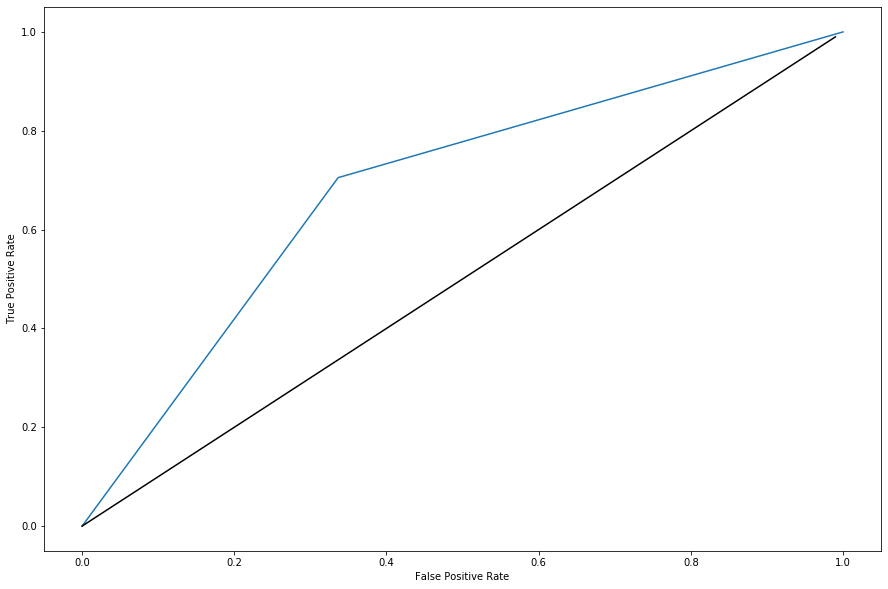

In [62]:
x = np.arange(0,1,.01)
y = [i for i in x]
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot(x,y, color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [54]:
print(roc_auc_score(y_test, y_pred))

0.6843234491171004
